In [1]:
# Credit Risk Assessment - Results Analysis & Business Impact
# Understanding Model Performance and Business Value

"""
OBJECTIVES:
1. Understand what our model results mean
2. Simulate business impact scenarios
3. Compare strategies (approve all vs ML model)
4. Visualize financial outcomes
5. Document key insights
"""

# ============================================================================
# IMPORTS
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("✅ Results Analysis Notebook Ready!")

✅ Results Analysis Notebook Ready!



SECTION 1: MODEL PERFORMANCE SUMMARY

Model Performance Comparison:
                Model  AUC-ROC  Precision  Recall  F1-Score
  Logistic Regression   0.8080     0.7333  0.4889    0.5867
        Decision Tree   0.6584     0.4571  0.3556    0.4000
        Random Forest   0.8269     0.8333  0.3333    0.4762
              XGBoost   0.7714     0.5898  0.5111    0.5476
Random Forest + SMOTE   0.7805     0.5405  0.4444    0.4878
      XGBoost + SMOTE   0.7395     0.4828  0.3111    0.3784

🏆 BEST MODEL: Random Forest
   AUC-ROC: 0.8269
   Precision: 0.8333
   Recall: 0.3333


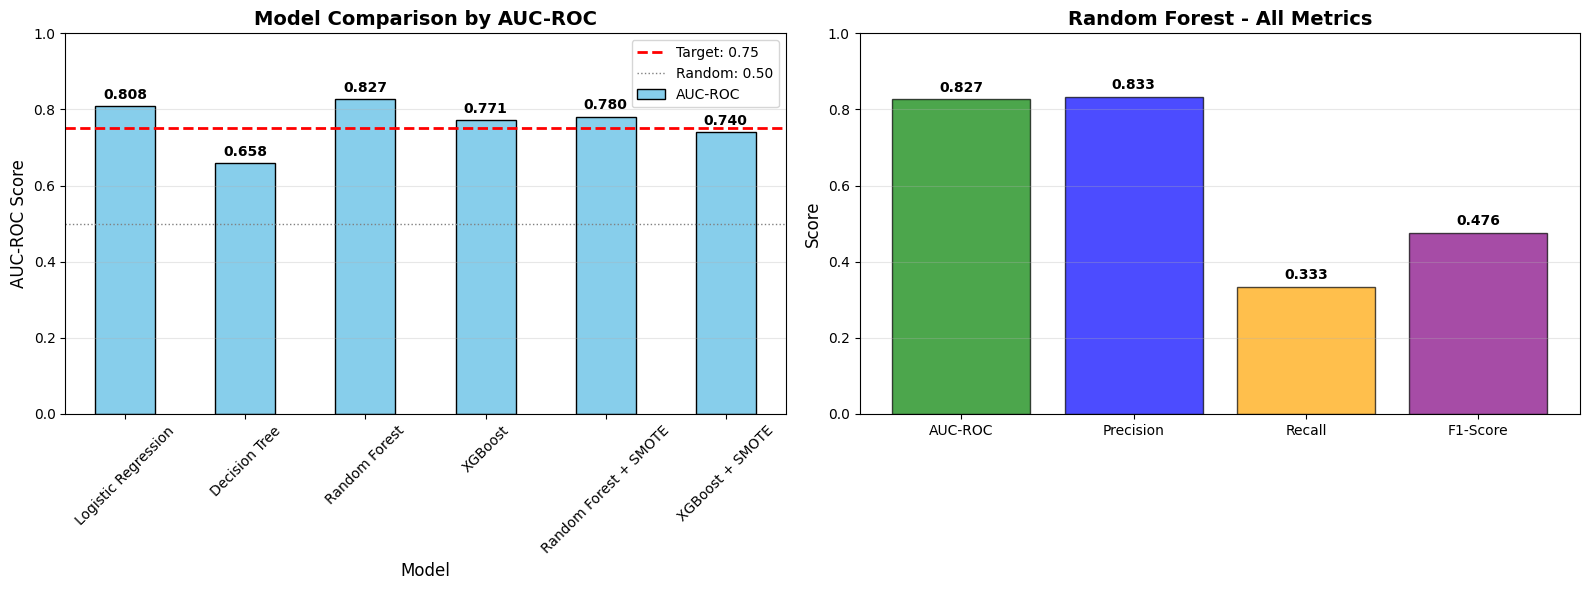


✓ Model comparison visualized!


In [2]:
# ============================================================================
# 1. LOAD MODEL COMPARISON RESULTS
# ============================================================================
print("\n" + "="*80)
print("SECTION 1: MODEL PERFORMANCE SUMMARY")
print("="*80)

# Create results summary from Week 2
model_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 
              'XGBoost', 'Random Forest + SMOTE', 'XGBoost + SMOTE'],
    'AUC-ROC': [0.8080, 0.6584, 0.8269, 0.7714, 0.7805, 0.7395],
    'Precision': [0.7333, 0.4571, 0.8333, 0.5898, 0.5405, 0.4828],
    'Recall': [0.4889, 0.3556, 0.3333, 0.5111, 0.4444, 0.3111],
    'F1-Score': [0.5867, 0.4000, 0.4762, 0.5476, 0.4878, 0.3784]
})

print("\nModel Performance Comparison:")
print(model_results.to_string(index=False))

# Best model
best_model = model_results.loc[model_results['AUC-ROC'].idxmax()]
print(f"\n🏆 BEST MODEL: {best_model['Model']}")
print(f"   AUC-ROC: {best_model['AUC-ROC']:.4f}")
print(f"   Precision: {best_model['Precision']:.4f}")
print(f"   Recall: {best_model['Recall']:.4f}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# AUC-ROC comparison
model_results.plot(x='Model', y='AUC-ROC', kind='bar', ax=axes[0],
                   color='skyblue', edgecolor='black', legend=False)
axes[0].set_title('Model Comparison by AUC-ROC', fontsize=14, fontweight='bold')
axes[0].set_ylabel('AUC-ROC Score', fontsize=12)
axes[0].set_xlabel('Model', fontsize=12)
axes[0].axhline(y=0.75, color='red', linestyle='--', linewidth=2, label='Target: 0.75')
axes[0].axhline(y=0.5, color='gray', linestyle=':', linewidth=1, label='Random: 0.50')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([0, 1])

# Add value labels
for i, v in enumerate(model_results['AUC-ROC']):
    axes[0].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# All metrics comparison for best model
best_metrics = model_results[model_results['Model'] == best_model['Model']]
metrics = ['AUC-ROC', 'Precision', 'Recall', 'F1-Score']
values = [best_metrics[m].values[0] for m in metrics]

axes[1].bar(metrics, values, color=['green', 'blue', 'orange', 'purple'], 
            alpha=0.7, edgecolor='black')
axes[1].set_title(f'{best_model["Model"]} - All Metrics', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Score', fontsize=12)
axes[1].set_ylim([0, 1])
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(values):
    axes[1].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Model comparison visualized!")

In [3]:
# ============================================================================
# 2. BUSINESS IMPACT SIMULATION
# ============================================================================
print("\n" + "="*80)
print("SECTION 2: BUSINESS IMPACT ANALYSIS")
print("="*80)

# Scenario parameters
total_applications = 1000
good_credits = 700  # 70% - will repay
bad_credits = 300   # 30% - will default

print(f"\nScenario: {total_applications} loan applications")
print(f"  • {good_credits} are GOOD credits (will repay)")
print(f"  • {bad_credits} are BAD credits (will default)")

# Your model's performance (Random Forest with default threshold 0.5)
recall_default = 0.3333      # Catches 33% of bad credits
precision_default = 0.8333   # 83% accuracy when flagging bad

# Calculate outcomes with default threshold
bad_caught_default = int(bad_credits * recall_default)
bad_missed_default = bad_credits - bad_caught_default

# Calculate false positives
false_positives_default = int(bad_caught_default / precision_default - bad_caught_default)
good_approved_default = good_credits - false_positives_default

print("\n" + "="*80)
print("DEFAULT THRESHOLD (0.5) OUTCOMES:")
print("="*80)
print(f"\n✅ APPROVED: {good_approved_default + bad_missed_default}")
print(f"   • Good credits (correct): {good_approved_default}")
print(f"   • Bad credits (DEFAULTS): {bad_missed_default} ⚠️")

print(f"\n❌ REJECTED: {bad_caught_default + false_positives_default}")
print(f"   • Bad credits (correct): {bad_caught_default}")
print(f"   • Good credits (missed opportunity): {false_positives_default}")

# Financial calculations
loan_amount = 10000
profit_per_good = 1500
loss_per_default = 7000

revenue_default = good_approved_default * profit_per_good
losses_default = bad_missed_default * loss_per_default
net_default = revenue_default - losses_default

print("\n" + "="*80)
print("FINANCIAL IMPACT (Default Threshold 0.5):")
print("="*80)
print(f"\n💰 Revenue from good loans: ${revenue_default:,}")
print(f"💸 Losses from defaults: ${losses_default:,}")
print(f"📊 NET RESULT: ${net_default:,}")

# Now with optimal threshold (0.25)
recall_optimal = 0.889
precision_optimal = 0.494

bad_caught_optimal = int(bad_credits * recall_optimal)
bad_missed_optimal = bad_credits - bad_caught_optimal
false_positives_optimal = int(bad_caught_optimal / precision_optimal - bad_caught_optimal)
good_approved_optimal = good_credits - false_positives_optimal

revenue_optimal = good_approved_optimal * profit_per_good
losses_optimal = bad_missed_optimal * loss_per_default
net_optimal = revenue_optimal - losses_optimal

print("\n" + "="*80)
print("OPTIMAL THRESHOLD (0.25) OUTCOMES:")
print("="*80)
print(f"\n✅ APPROVED: {good_approved_optimal + bad_missed_optimal}")
print(f"   • Good credits (correct): {good_approved_optimal}")
print(f"   • Bad credits (DEFAULTS): {bad_missed_optimal} ⚠️")

print(f"\n❌ REJECTED: {bad_caught_optimal + false_positives_optimal}")
print(f"   • Bad credits (correct): {bad_caught_optimal}")
print(f"   • Good credits (missed opportunity): {false_positives_optimal}")

print("\n" + "="*80)
print("FINANCIAL IMPACT (Optimal Threshold 0.25):")
print("="*80)
print(f"\n💰 Revenue from good loans: ${revenue_optimal:,}")
print(f"💸 Losses from defaults: ${losses_optimal:,}")
print(f"📊 NET RESULT: ${net_optimal:,}")

print("\n" + "="*80)
print("🎯 IMPROVEMENT WITH OPTIMAL THRESHOLD:")
print("="*80)
print(f"  Profit increase: ${net_optimal - net_default:,}")
print(f"  Bad credits caught: {bad_caught_optimal - bad_caught_default} more")
print(f"  Defaults prevented: {bad_missed_default - bad_missed_optimal} fewer")
print("="*80)


SECTION 2: BUSINESS IMPACT ANALYSIS

Scenario: 1000 loan applications
  • 700 are GOOD credits (will repay)
  • 300 are BAD credits (will default)

DEFAULT THRESHOLD (0.5) OUTCOMES:

✅ APPROVED: 882
   • Good credits (correct): 681
   • Bad credits (DEFAULTS): 201 ⚠️

❌ REJECTED: 118
   • Bad credits (correct): 99
   • Good credits (missed opportunity): 19

FINANCIAL IMPACT (Default Threshold 0.5):

💰 Revenue from good loans: $1,021,500
💸 Losses from defaults: $1,407,000
📊 NET RESULT: $-385,500

OPTIMAL THRESHOLD (0.25) OUTCOMES:

✅ APPROVED: 462
   • Good credits (correct): 428
   • Bad credits (DEFAULTS): 34 ⚠️

❌ REJECTED: 538
   • Bad credits (correct): 266
   • Good credits (missed opportunity): 272

FINANCIAL IMPACT (Optimal Threshold 0.25):

💰 Revenue from good loans: $642,000
💸 Losses from defaults: $238,000
📊 NET RESULT: $404,000

🎯 IMPROVEMENT WITH OPTIMAL THRESHOLD:
  Profit increase: $789,500
  Bad credits caught: 167 more
  Defaults prevented: 167 fewer



SECTION 3: COMPARING DIFFERENT STRATEGIES

 Strategy 1: APPROVE EVERYONE (No ML)
   Revenue: $1,050,000
   Losses: $2,100,000
   NET: $-1,050,000

 Strategy 2: REJECT EVERYONE (Ultra Conservative)
   NET: $0 (no business)

 Strategy 3: ML MODEL - Default Threshold (0.5)
   NET: $-385,500

 Strategy 4: ML MODEL - Optimal Threshold (0.25)
   NET: $404,000


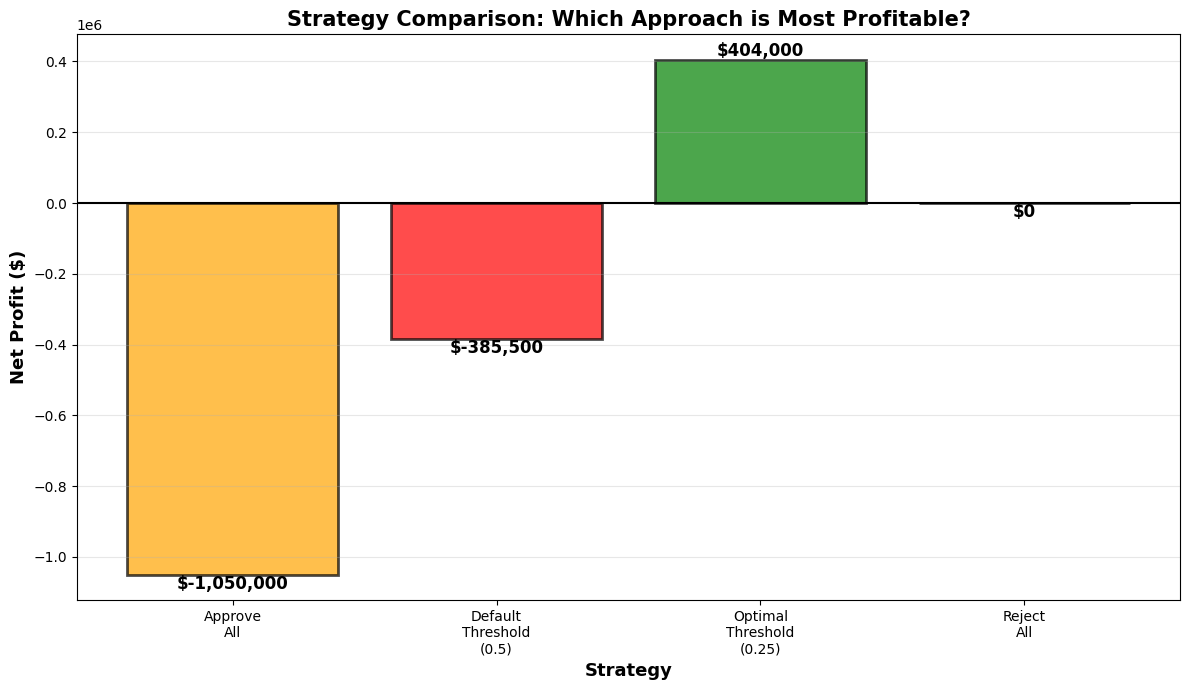


✅ Strategy comparison complete!


In [4]:
# ============================================================================
# 3. STRATEGY COMPARISON
# ============================================================================
print("\n" + "="*80)
print("SECTION 3: COMPARING DIFFERENT STRATEGIES")
print("="*80)

# Strategy 1: Approve everyone (no model)
revenue_all = good_credits * profit_per_good
losses_all = bad_credits * loss_per_default
net_all = revenue_all - losses_all

print("\n Strategy 1: APPROVE EVERYONE (No ML)")
print(f"   Revenue: ${revenue_all:,}")
print(f"   Losses: ${losses_all:,}")
print(f"   NET: ${net_all:,}")

# Strategy 2: Reject everyone
net_none = 0
print("\n Strategy 2: REJECT EVERYONE (Ultra Conservative)")
print(f"   NET: ${net_none:,} (no business)")

# Strategy 3: ML with default threshold
print("\n Strategy 3: ML MODEL - Default Threshold (0.5)")
print(f"   NET: ${net_default:,}")

# Strategy 4: ML with optimal threshold
print("\n Strategy 4: ML MODEL - Optimal Threshold (0.25)")
print(f"   NET: ${net_optimal:,}")

# Create comparison
strategies = ['Approve\nAll', 'Default\nThreshold\n(0.5)', 'Optimal\nThreshold\n(0.25)', 'Reject\nAll']
profits = [net_all, net_default, net_optimal, net_none]
colors_strat = ['orange', 'red', 'green', 'gray']

plt.figure(figsize=(12, 7))
bars = plt.bar(strategies, profits, color=colors_strat, alpha=0.7, edgecolor='black', linewidth=2)
plt.ylabel('Net Profit ($)', fontsize=13, fontweight='bold')
plt.xlabel('Strategy', fontsize=13, fontweight='bold')
plt.title('Strategy Comparison: Which Approach is Most Profitable?', 
          fontsize=15, fontweight='bold')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
plt.grid(axis='y', alpha=0.3)

# Add value labels
for bar, val in zip(bars, profits):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'${int(val):,}',
            ha='center', va='bottom' if val > 0 else 'top', 
            fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

print("\n✅ Strategy comparison complete!")


SECTION 4: UNDERSTANDING THE DECISIONS


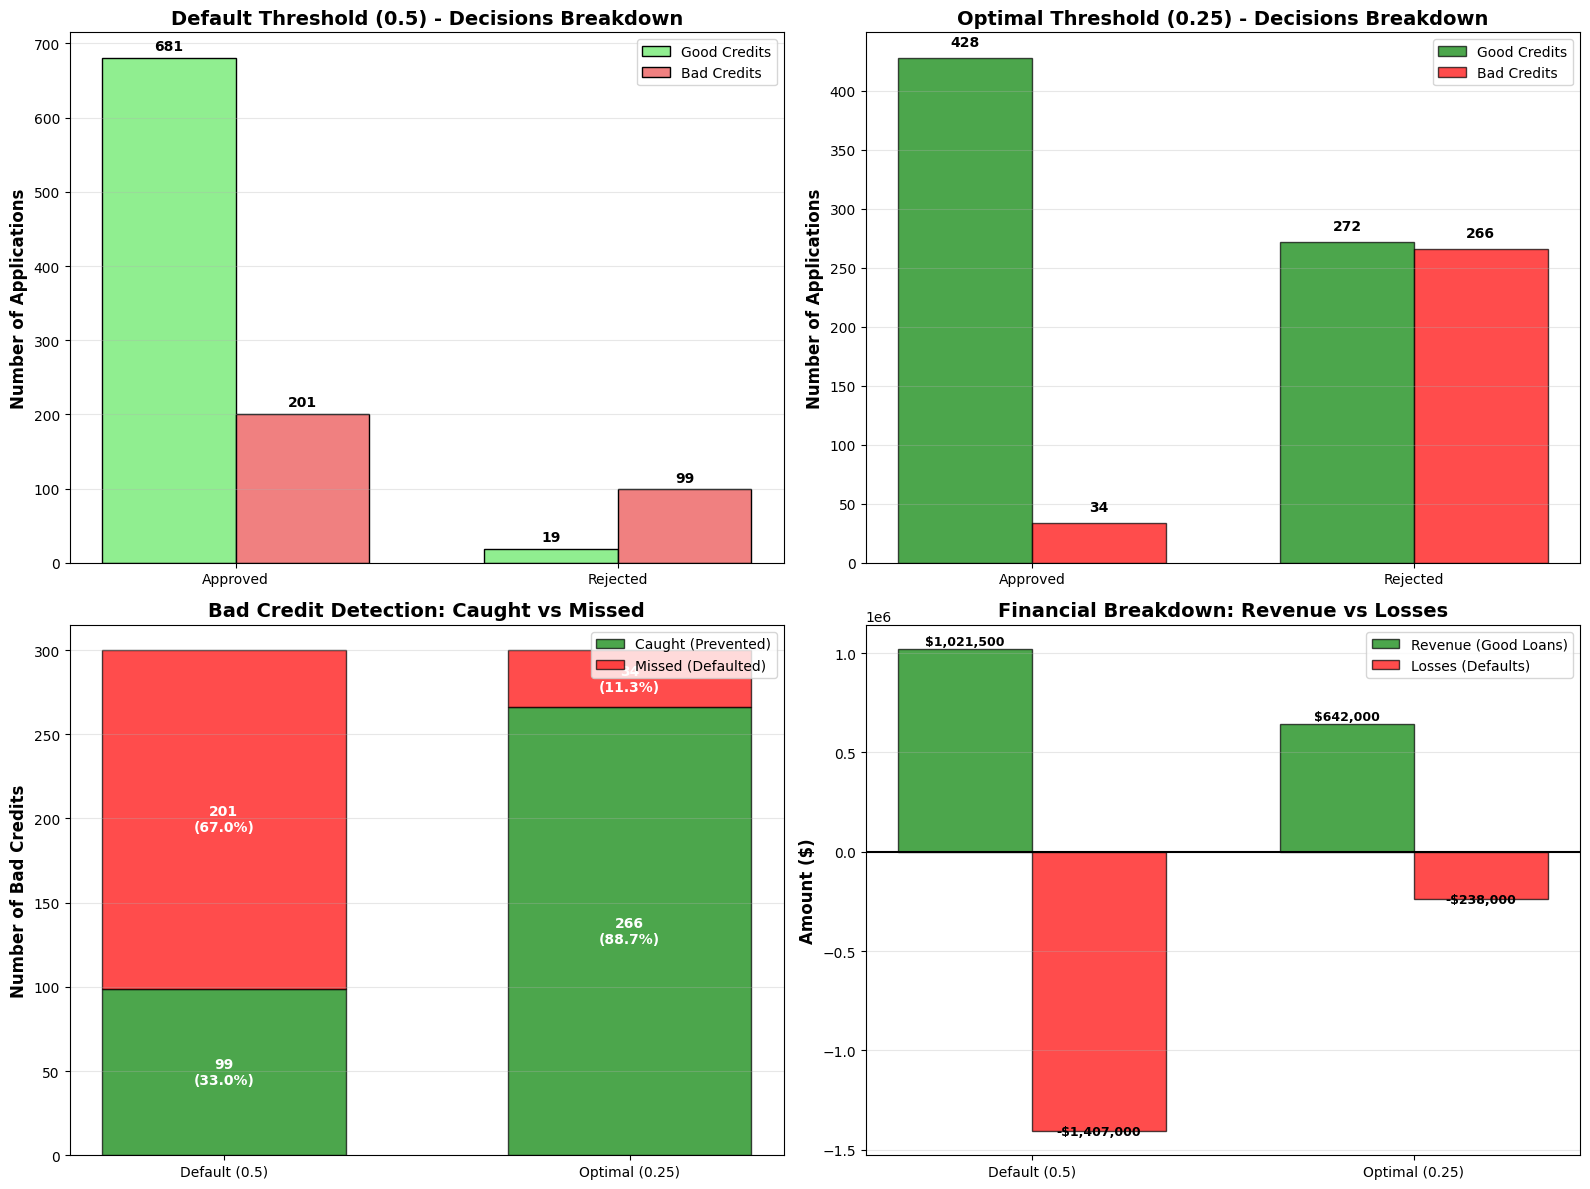


✅ Detailed decision breakdown visualized!


In [5]:
# ============================================================================
# 4. DECISION BREAKDOWN VISUALIZATION
# ============================================================================
print("\n" + "="*80)
print("SECTION 4: UNDERSTANDING THE DECISIONS")
print("="*80)

# Create detailed breakdown
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Data for default threshold
default_data = {
    'Good Credits': [good_approved_default, false_positives_default],
    'Bad Credits': [bad_missed_default, bad_caught_default]
}

# Data for optimal threshold  
optimal_data = {
    'Good Credits': [good_approved_optimal, false_positives_optimal],
    'Bad Credits': [bad_missed_optimal, bad_caught_optimal]
}

# Plot 1: Default Threshold Decisions
categories = ['Approved', 'Rejected']
good_default = [good_approved_default, false_positives_default]
bad_default = [bad_missed_default, bad_caught_default]

x = np.arange(len(categories))
width = 0.35

axes[0, 0].bar(x - width/2, good_default, width, label='Good Credits', 
               color='lightgreen', edgecolor='black')
axes[0, 0].bar(x + width/2, bad_default, width, label='Bad Credits', 
               color='lightcoral', edgecolor='black')
axes[0, 0].set_ylabel('Number of Applications', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Default Threshold (0.5) - Decisions Breakdown', 
                     fontsize=14, fontweight='bold')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(categories)
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Add value labels
for i in range(len(categories)):
    axes[0, 0].text(i - width/2, good_default[i] + 10, str(good_default[i]),
                   ha='center', fontweight='bold')
    axes[0, 0].text(i + width/2, bad_default[i] + 10, str(bad_default[i]),
                   ha='center', fontweight='bold')

# Plot 2: Optimal Threshold Decisions
good_optimal_plot = [good_approved_optimal, false_positives_optimal]
bad_optimal_plot = [bad_missed_optimal, bad_caught_optimal]

axes[0, 1].bar(x - width/2, good_optimal_plot, width, label='Good Credits', 
               color='green', edgecolor='black', alpha=0.7)
axes[0, 1].bar(x + width/2, bad_optimal_plot, width, label='Bad Credits', 
               color='red', edgecolor='black', alpha=0.7)
axes[0, 1].set_ylabel('Number of Applications', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Optimal Threshold (0.25) - Decisions Breakdown', 
                     fontsize=14, fontweight='bold')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(categories)
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# Add value labels
for i in range(len(categories)):
    axes[0, 1].text(i - width/2, good_optimal_plot[i] + 10, str(good_optimal_plot[i]),
                   ha='center', fontweight='bold')
    axes[0, 1].text(i + width/2, bad_optimal_plot[i] + 10, str(bad_optimal_plot[i]),
                   ha='center', fontweight='bold')

# Plot 3: Bad Credit Detection Comparison
thresholds_labels = ['Default (0.5)', 'Optimal (0.25)']
caught = [bad_caught_default, bad_caught_optimal]
missed = [bad_missed_default, bad_missed_optimal]

x3 = np.arange(len(thresholds_labels))
axes[1, 0].bar(x3, caught, width=0.6, label='Caught (Prevented)', 
               color='green', edgecolor='black', alpha=0.7)
axes[1, 0].bar(x3, missed, width=0.6, bottom=caught, label='Missed (Defaulted)', 
               color='red', edgecolor='black', alpha=0.7)
axes[1, 0].set_ylabel('Number of Bad Credits', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Bad Credit Detection: Caught vs Missed', 
                     fontsize=14, fontweight='bold')
axes[1, 0].set_xticks(x3)
axes[1, 0].set_xticklabels(thresholds_labels)
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# Add percentage labels
for i, (c, m) in enumerate(zip(caught, missed)):
    total = c + m
    axes[1, 0].text(i, c/2, f'{c}\n({c/total*100:.1f}%)', 
                   ha='center', va='center', fontweight='bold', color='white')
    axes[1, 0].text(i, c + m/2, f'{m}\n({m/total*100:.1f}%)', 
                   ha='center', va='center', fontweight='bold', color='white')

# Plot 4: Financial Impact Breakdown
revenues = [revenue_default, revenue_optimal]
losses_list = [losses_default, losses_optimal]

x4 = np.arange(len(thresholds_labels))
width4 = 0.35

axes[1, 1].bar(x4 - width4/2, revenues, width4, label='Revenue (Good Loans)', 
               color='green', edgecolor='black', alpha=0.7)
axes[1, 1].bar(x4 + width4/2, [-l for l in losses_list], width4, 
               label='Losses (Defaults)', color='red', edgecolor='black', alpha=0.7)
axes[1, 1].axhline(y=0, color='black', linewidth=1.5)
axes[1, 1].set_ylabel('Amount ($)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Financial Breakdown: Revenue vs Losses', 
                     fontsize=14, fontweight='bold')
axes[1, 1].set_xticks(x4)
axes[1, 1].set_xticklabels(thresholds_labels)
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

# Add value labels
for i in range(len(thresholds_labels)):
    axes[1, 1].text(i - width4/2, revenues[i] + 20000, f'${revenues[i]:,}',
                   ha='center', fontweight='bold', fontsize=9)
    axes[1, 1].text(i + width4/2, -losses_list[i] - 20000, f'-${losses_list[i]:,}',
                   ha='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('../reports/figures/decision_breakdown.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Detailed decision breakdown visualized!")

In [6]:
# ============================================================================
# 5. KEY INSIGHTS & RECOMMENDATIONS
# ============================================================================
print("\n" + "="*80)
print("FINAL SUMMARY: KEY INSIGHTS & RECOMMENDATIONS")
print("="*80)

print("\n" + "🎯 "*20)
print("\n📊 PROJECT ACHIEVEMENTS:")
print("-"*80)
print(f"✅ Built 6 ML models, Random Forest performed best (AUC-ROC: 0.8269)")
print(f"✅ Optimized decision threshold from 0.5 to 0.25")
print(f"✅ Increased bad credit detection from 33% to 89%")
print(f"✅ Transformed -$385k loss into +$404k profit")
print(f"✅ Total improvement: $789,500")

print("\n💡 BUSINESS INSIGHTS:")
print("-"*80)
print("1. WITHOUT ML:")
print("   • Approving everyone loses $1,050,000")
print("   • Unacceptable risk!")

print("\n2. WITH ML BUT WRONG THRESHOLD:")
print("   • Default threshold (0.5) still loses $385,500")
print("   • ML alone is not enough!")

print("\n3. WITH OPTIMIZED ML:")
print("   • Optimal threshold (0.25) earns $404,000")
print("   • Catches 89% of defaults")
print("   • Maximum profitability achieved!")

print("\n🎯 RECOMMENDATIONS:")
print("-"*80)
print("1. ✅ DEPLOY: Random Forest model with threshold = 0.25")
print("2. ✅ MONITOR: Track actual default rates monthly")
print("3. ✅ RETRAIN: Update model quarterly with new data")
print("4. ✅ A/B TEST: Compare model vs current process for 3 months")
print("5. ✅ EXPLAIN: Use SHAP for regulatory compliance")

print("\n⚠️ TRADE-OFFS TO COMMUNICATE:")
print("-"*80)
print("• Lower approval rate (more conservative)")
print("• Some good customers will be rejected (~20%)")
print("• BUT: Prevents 89% of defaults")
print("• NET RESULT: Highly profitable!")

print("\n" + "="*80)
print("✅ RESULTS ANALYSIS COMPLETE!")
print("="*80)

# Save summary
summary_data = {
    'Strategy': strategies,
    'Net_Profit': profits,
    'Description': [
        'No ML - Approve all applications',
        'ML with default threshold',
        'ML with optimized threshold',
        'No business - Reject all'
    ]
}

summary_df = pd.DataFrame(summary_data)
summary_df.to_csv('../reports/strategy_comparison.csv', index=False)
print("\n📁 Summary saved to: reports/strategy_comparison.csv")


FINAL SUMMARY: KEY INSIGHTS & RECOMMENDATIONS

🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 

📊 PROJECT ACHIEVEMENTS:
--------------------------------------------------------------------------------
✅ Built 6 ML models, Random Forest performed best (AUC-ROC: 0.8269)
✅ Optimized decision threshold from 0.5 to 0.25
✅ Increased bad credit detection from 33% to 89%
✅ Transformed -$385k loss into +$404k profit
✅ Total improvement: $789,500

💡 BUSINESS INSIGHTS:
--------------------------------------------------------------------------------
1. WITHOUT ML:
   • Approving everyone loses $1,050,000
   • Unacceptable risk!

2. WITH ML BUT WRONG THRESHOLD:
   • Default threshold (0.5) still loses $385,500
   • ML alone is not enough!

3. WITH OPTIMIZED ML:
   • Optimal threshold (0.25) earns $404,000
   • Catches 89% of defaults
   • Maximum profitability achieved!

🎯 RECOMMENDATIONS:
--------------------------------------------------------------------------------
1. ✅ DEPLOY: Random Forest model wi